In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../module/')

from keras2.models import Model
from keras2.layers import concatenate, Dense, Input, Flatten
from keras2.optimizers import Adam

from util import *
import gym2
from rl2.agents import eventDDPGAgent
from rl2.memory import SequentialMemory

Using TensorFlow backend.
Using TensorFlow backend.


In [2]:
# GymのPendulum環境を作成
dt = 0.005
env = gym2.make("Pendulum-v1", dt)

# 取りうる”打ち手”のアクション数と値の定義
nb_actios = 2
ACT_ID_TO_VALUE = {0: [-1], 1: [+1]}

In [3]:
def actor_net(a_shape, s_shape):
    action_input = Input(shape=(1,)+s_shape)
    x = Flatten()(action_input)
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(3, activation="multiple_tanh")(x)
    actor = Model(inputs=action_input, outputs=x)
    return actor

def critic_net(a_shape , s_shape):
    action_input = Input(a_shape)
    observation_input = Input(shape=(1,)+s_shape)
    flattened_observation = Flatten()(observation_input)
    x = concatenate([action_input, flattened_observation])
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(1, activation="linear")(x)
    critic = Model(inputs=[action_input, observation_input], outputs=x)
    return (critic, action_input)

def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = eventDDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        clip_com = 0.01
    )
    return agent

In [5]:
#safe learning
l = 0.5
step = 1000000
episode_step = int(200 * 0.05 / dt)
time_mode = False
a = agent((3,),(2,))
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mae"])
#a.load_weights('../learned_models_vol2/0.5standup-agent.h5')
a.fit(env, lam=l, nb_steps=step, visualize=0, verbose=1, nb_max_episode_steps=episode_step, loss_graph=0, time_mode=time_mode)

Training for 1000000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 36s 4ms/step - reward: -9.8979
5 episodes - episode_reward: -19795.858 [-20394.051, -17528.817] - loss: 5.245 - mean_absolute_error: 2.333 - mean_q: -44.517

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 39s 4ms/step - reward: -8.2698
5 episodes - episode_reward: -16539.670 [-19317.206, -8528.160] - loss: 9.060 - mean_absolute_error: 2.528 - mean_q: -97.033

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 40s 4ms/step - reward: -5.2692
5 episodes - episode_reward: -10538.362 [-13992.898, -7794.737] - loss: 11.828 - mean_absolute_error: 2.859 - mean_q: -85.055

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 41s 4ms/step - reward: -8.0316
5 episodes - episode_reward: -16063.221 [-18492.568, -13465.702] - loss: 11.192 - mean_absolute_error: 2.490 - mean_q: -79.910

Interval 5 (4

Interval 35 (340000 steps performed)
10000/10000 [==============================] - 43s 4ms/step - reward: -3.6517
5 episodes - episode_reward: -7303.304 [-10344.166, -6242.089] - loss: 12.297 - mean_absolute_error: 2.263 - mean_q: -4.567

Interval 36 (350000 steps performed)
10000/10000 [==============================] - 43s 4ms/step - reward: -6.8856
5 episodes - episode_reward: -13771.227 [-16003.928, -11525.558] - loss: 12.344 - mean_absolute_error: 1.952 - mean_q: -37.104

Interval 37 (360000 steps performed)
10000/10000 [==============================] - 43s 4ms/step - reward: -7.2484
5 episodes - episode_reward: -14496.743 [-17382.523, -12048.864] - loss: 11.626 - mean_absolute_error: 2.108 - mean_q: -85.668

Interval 38 (370000 steps performed)
10000/10000 [==============================] - 43s 4ms/step - reward: -7.4041
5 episodes - episode_reward: -14808.270 [-16089.587, -13671.470] - loss: 14.104 - mean_absolute_error: 2.211 - mean_q: -119.392

Interval 39 (380000 steps perf

10000/10000 [==============================] - 42s 4ms/step - reward: -7.2970
5 episodes - episode_reward: -14593.926 [-16183.722, -13566.491] - loss: 53.075 - mean_absolute_error: 2.915 - mean_q: -306.588

Interval 70 (690000 steps performed)
10000/10000 [==============================] - 42s 4ms/step - reward: -7.1841
5 episodes - episode_reward: -14368.100 [-15995.101, -13374.764] - loss: 75.874 - mean_absolute_error: 3.494 - mean_q: -316.018

Interval 71 (700000 steps performed)
10000/10000 [==============================] - 42s 4ms/step - reward: -6.4800
5 episodes - episode_reward: -12960.004 [-14794.634, -11081.814] - loss: 133.653 - mean_absolute_error: 4.383 - mean_q: -319.915

Interval 72 (710000 steps performed)
10000/10000 [==============================] - 42s 4ms/step - reward: -7.5303
5 episodes - episode_reward: -15060.538 [-18322.247, -13091.798] - loss: 182.047 - mean_absolute_error: 5.340 - mean_q: -329.165

Interval 73 (720000 steps performed)
10000/10000 [=========

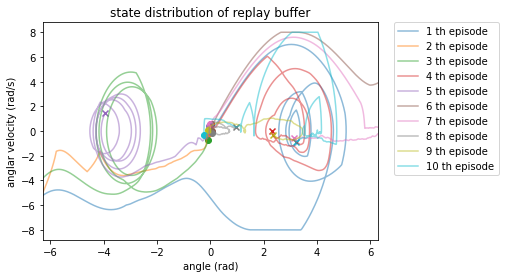

In [10]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, em in enumerate(a.state_memory):
    if i>len(cycle)-1:
        continue
    plt.scatter(em[0,0], em[0,1], marker='o', color=cycle[i])
    plt.scatter(em[-1,0], em[-1,1], marker='x', color=cycle[i])
    plt.plot(em[:,0], em[:,1], color=cycle[i], label=f'{i+1} th episode', alpha=0.5)
plt.xlabel('angle (rad)')
plt.ylabel('anglar velocity (rad/s)')
plt.title('state distribution of replay buffer')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim(-2*np.pi, 2*np.pi)
plt.show()

In [10]:
print(a.state_memory[0].shape)

AttributeError: 'list' object has no attribute 'shape'